In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
ROOT = '/content/drive/'
drive.mount(ROOT)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%ls
PATH = '/content/drive/My Drive/predicting graduate admission'

drive/  sample_data/


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(PATH + '/input/train.csv')

# Data Exploration

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.drop(labels=['Serial No.'], axis=1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


There are many features given to predict the chance of admission of a student in a particular university. For ex. - GRE Score, SOP, LOR, etc. 

Now, we will analyse these features using univariate and multivariate analysis.

## Heat Map

Heatmap uses pearson's correlation to plot a map between every feature. 

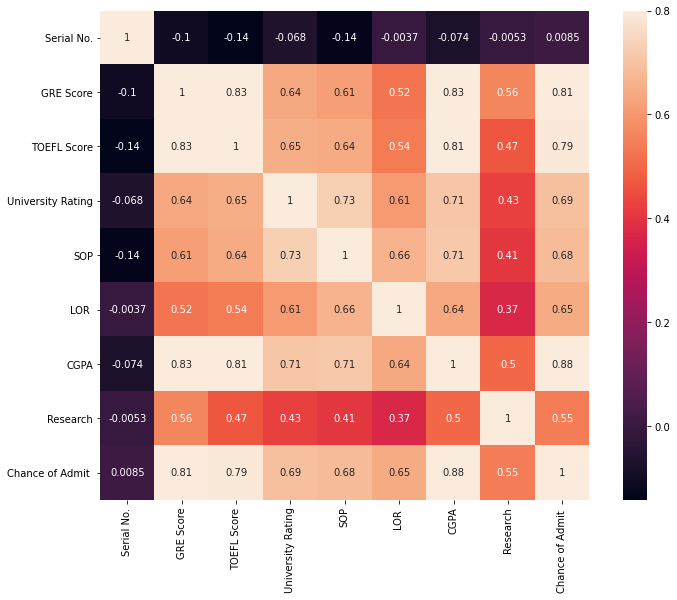

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize= (12, 9))

sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

We can see from the above heatmap, the correlation between every feature. Some features like GRE Score and TOEFL Score are highly correlated, while others like Research and LOR are least correlated. 

In [ ]:
# dividing columns as continuous cols and categorical columns
cols = ['GRE Score', 'TOEFL Score', 'SOP', 'CGPA', 'Chance of Admit ', 'University Rating', 'Research', 'LOR ']
cont_cols = ['GRE Score', 'TOEFL Score', 'SOP', 'CGPA', 'Chance of Admit ']
cat_cols = ['University Rating', 'Research', 'LOR ']

## Univariate Analysis

Univariate analysis is done to analyse each feature indivisually using various graphs

### Histogram

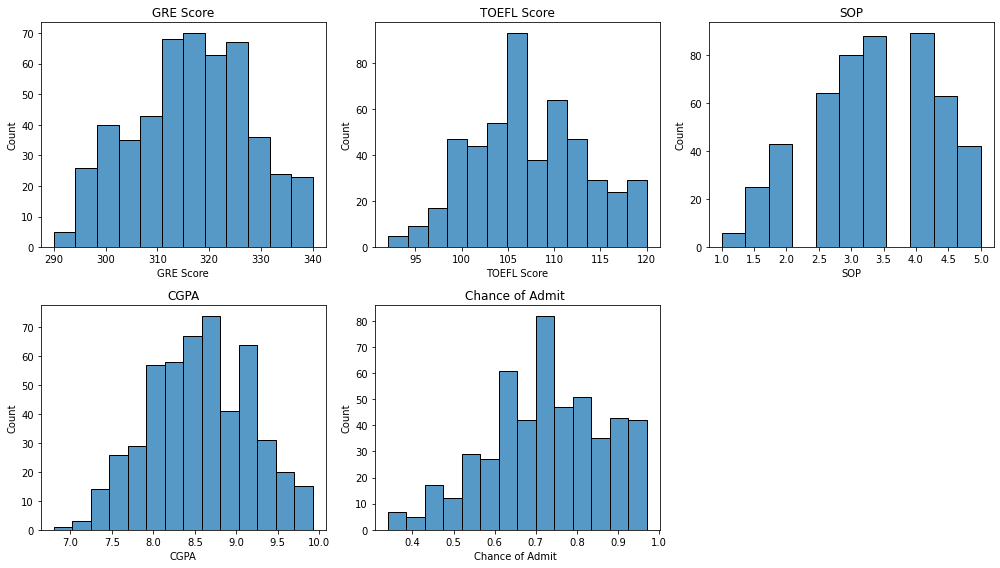

In [ ]:
fig = plt.figure(1, (14, 8))

for i, col in enumerate(cont_cols):
  ax = plt.subplot(2, 3, i+1)
  sns.histplot(data=df, x=col)
  plt.title(col)
  plt.tight_layout()
plt.show()

This histogram is showing us the distribution of features that have continous values

### Countplot

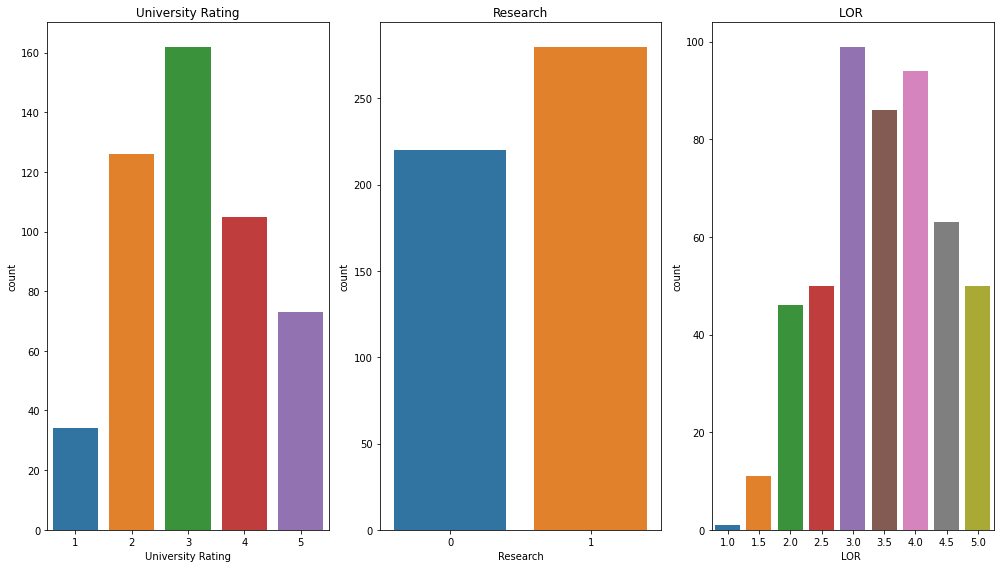

In [ ]:
fig = plt.figure(1, (14, 8))

for i, col in enumerate(cat_cols):
  ax = plt.subplot(1, 3, i+1)
  sns.countplot(x=col, data=df)
  plt.title(col)
  plt.tight_layout()
plt.show()

This gives the distribution of categorical features.

### Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

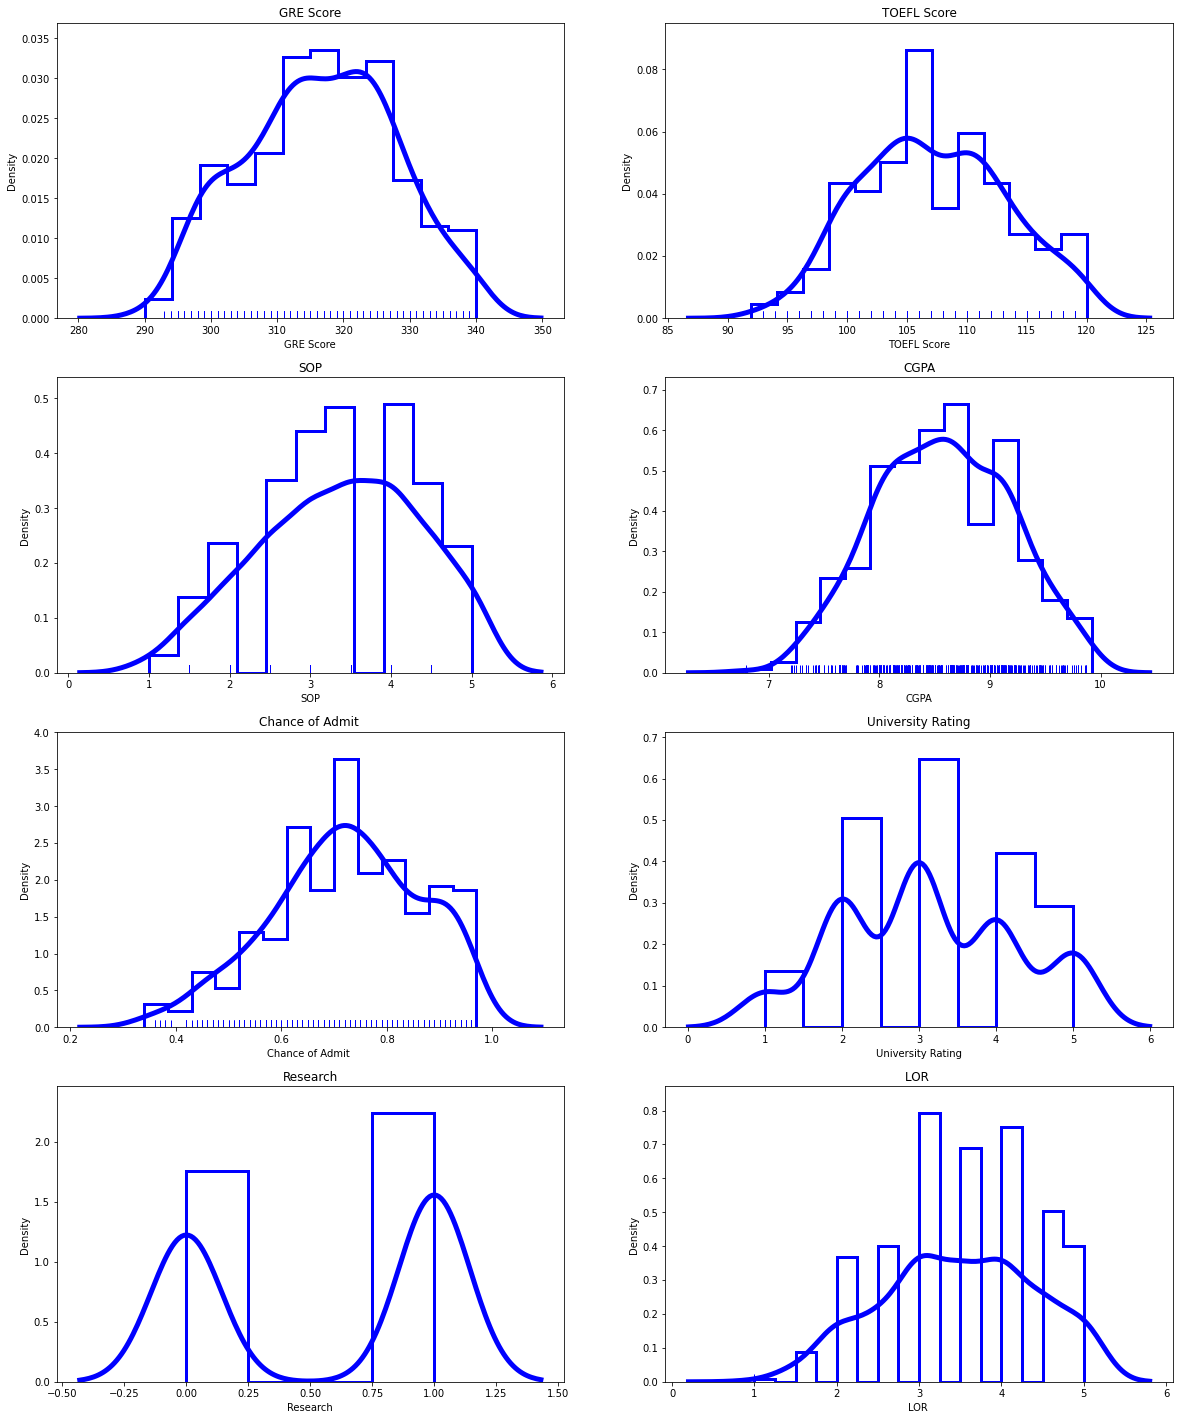

In [ ]:
plt.figure(figsize=(20, 25))
i = 0

for col in cols:
  i += 1
  plt.subplot(4, 2, i)
  sns.distplot(df[col], rug=True, rug_kws={"color": "b"},kde=True,
                 kde_kws={"color": "blue", "lw": 5, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "blue"},label="{0}".format(col))
  plt.title(col)

This gives us a distribution using kde line

### Scatter Plot

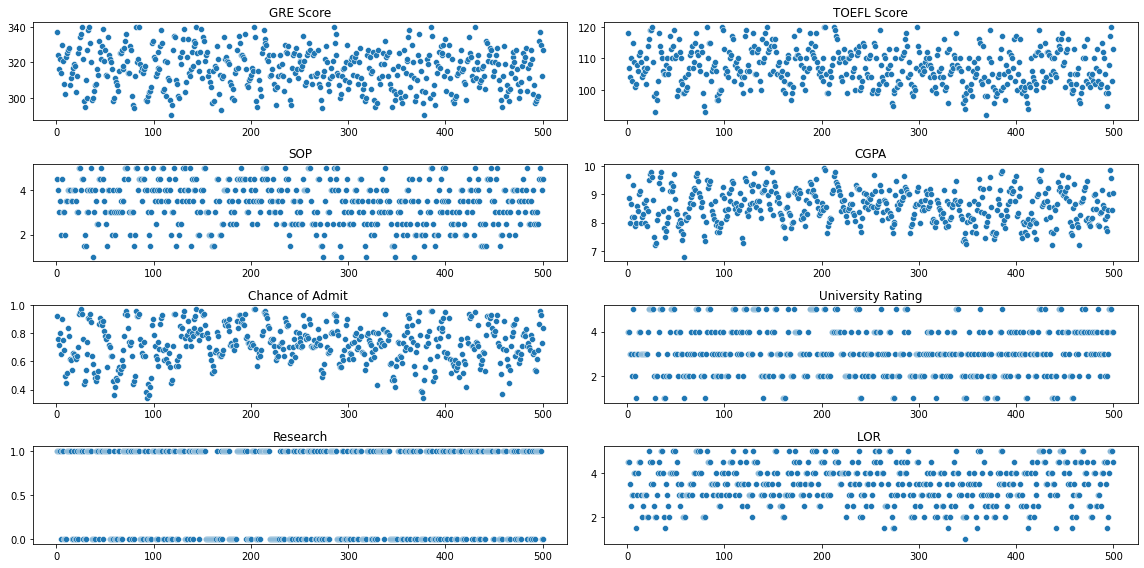

In [ ]:
fig = plt.figure(figsize=(16, 8))

for i, col in enumerate(cols):
  plt.subplot(4, 2, i + 1)
  sns.scatterplot(x=np.arange(1, 501), y=df[col].values.tolist())
  plt.title(col)
  plt.tight_layout()

plt.show()

Scatter plot distributes the occurences of various features across the whole dataset. It helps us visualise the frequency 

## Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


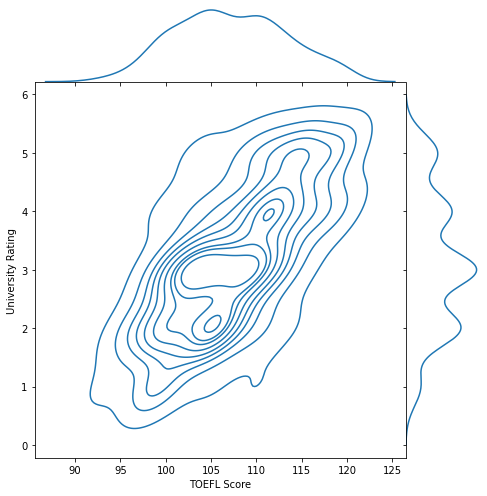

In [ ]:
g = sns.jointplot(df['TOEFL Score'], df['University Rating'], kind="kde", height=7, space=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


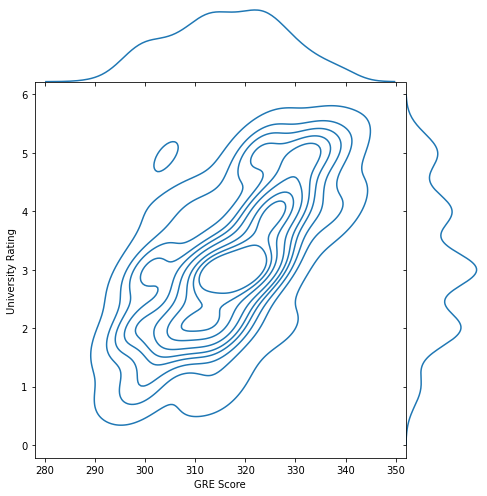

In [ ]:
g = sns.jointplot(df['GRE Score'], df['University Rating'], kind="kde", height=7, space=0)
plt.show()

# Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; yo

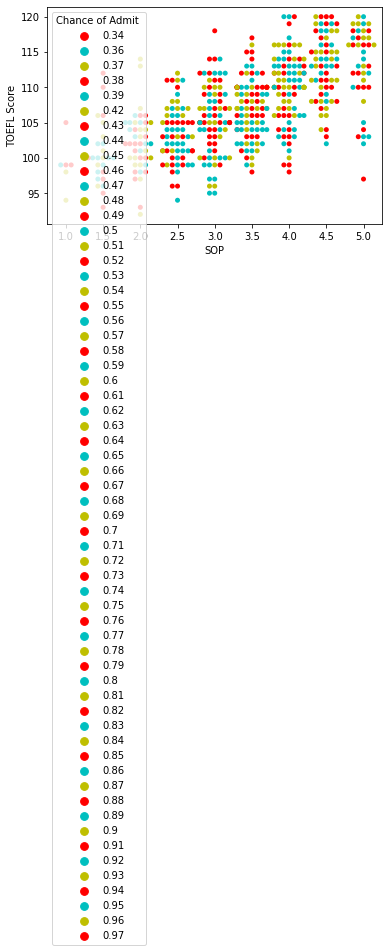

In [ ]:
sns.swarmplot(y="TOEFL Score", x="SOP", hue="Chance of Admit ",
              palette=["r", "c", "y"], data=df)
plt.show()


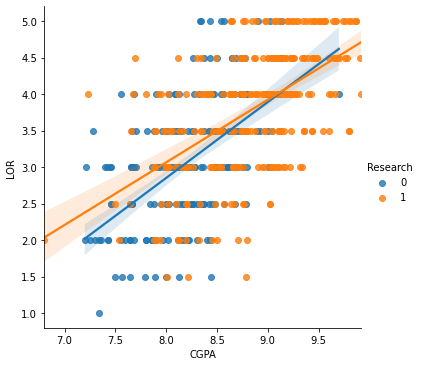

In [ ]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.show()